# 1. Introduction
# Time Series - VARMAX

It is an extension of VARMA model where extra variables called covariates are used to model the primary variable we are interested it.

Exogenous variables are also called covariates and can be thought of as parallel input sequences that have observations at the same time steps as the original series. The primary series(es) are referred to as endogenous data to contrast it from the exogenous sequence(s). The observations for exogenous variables are included in the model directly at each time step and are not modeled in the same way as the primary endogenous sequence (e.g. as an AR, MA, etc. process).
The VARMAX method can also be used to model the subsumed models with exogenous variables, such as VARX and VMAX.

`The method is suitable for multivariate time series without trend and seasonal components with exogenous variables.`




# 2 Import the required package

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima.model import ARIMA
plt.rcParams["axes.grid"]=True
from statsmodels.graphics.tsaplots  import plot_acf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX


# 3. import the time series data
In this project, I will be using the us_retail dataset(Clothing column). The dataset consist of monthly records of sale across various retails sales in us, the data was download from kaggle site 

In [62]:
path="C:/Users/pc/Desktop/1/Data Science/Deep Learning/Time Series/comp/"
df = pd.read_csv(path + "us_retail_sales.csv")
df.head()

,Month,Clothing,Appliances,FoodAndBeverage,Automobiles,GeneralMerchandise,BuildingMaterials
0,1992-01,6938,3657,29589,26788,14996,8964
1,1992-02,7524,3490,28570,28203,16015,9023
2,1992-03,8475,3669,29682,31684,17984,10608
3,1992-04,9401,3527,30228,32547,18872,11630
4,1992-05,9558,3571,31677,32883,20037,12327


In [63]:
# extract the neede columns
df_Automobiles= df[[ "Month","Automobiles"]]
df_Automobiles.head()

,Month,Automobiles
0,1992-01,26788
1,1992-02,28203
2,1992-03,31684
3,1992-04,32547
4,1992-05,32883


In [64]:
# check the summary of the data
df_Automobiles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        336 non-null    object
 1   Automobiles  336 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.4+ KB


the month column is of object data type. First i will convert it to datetime and make it as index of the dataframe

In [65]:
df_Automobiles["Month"]= pd.to_datetime(df_Automobiles["Month"], format="%Y-%m")

<ipython-input-65-3b443c5d36f1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Automobiles["Month"]= pd.to_datetime(df_Automobiles["Month"], format="%Y-%m")


In [66]:
df_Automobiles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Month        336 non-null    datetime64[ns]
 1   Automobiles  336 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 5.4 KB


In [67]:
# set the month column as index
df_Automobiles.set_index("Month", inplace=True)

# 4. Time Series Analysis

# 4.1 Missing values

In [68]:
# check for missing values
df_Automobiles.isna().sum()

Automobiles    0
dtype: int64

# 4.2 Plot the time series dat

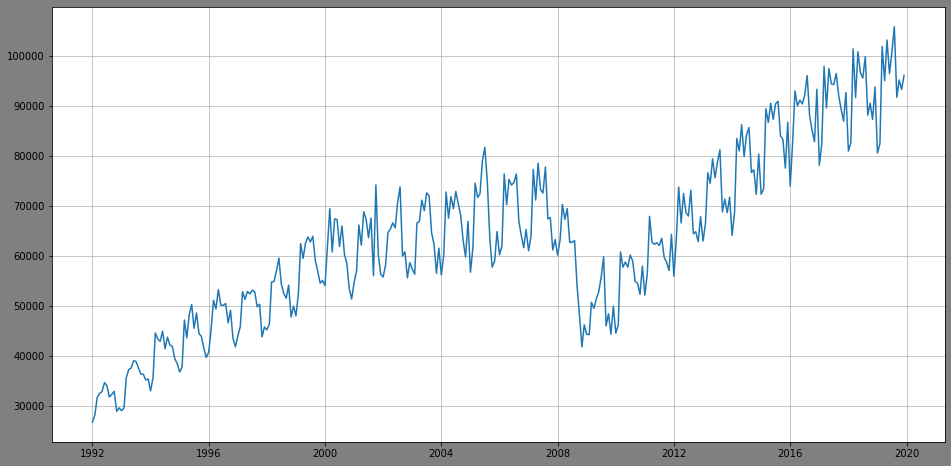

In [69]:
fig, ax = plt.subplots(figsize=(16, 8), facecolor=("grey"))
ax.grid(True, alpha=.9)
ax.plot(df_Automobiles)

# 4.3  Time Series Decomposition
 

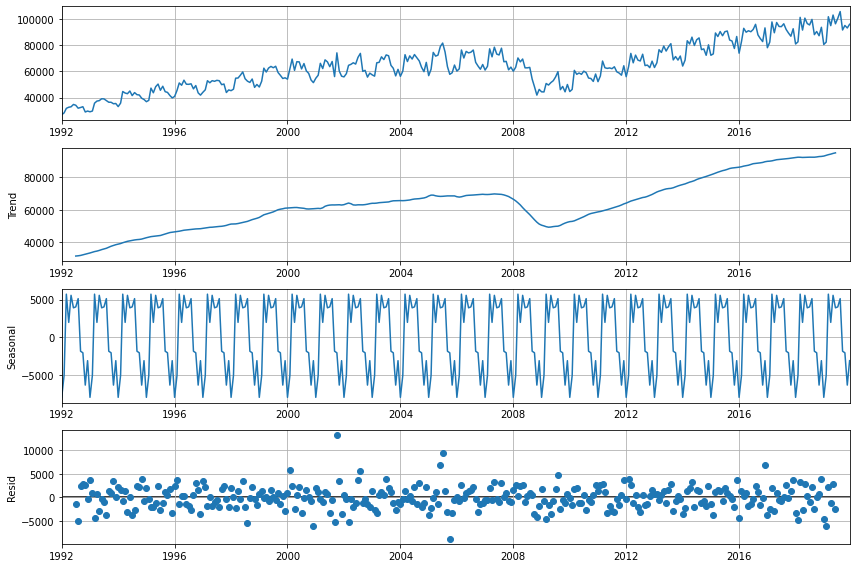

In [70]:
# additive decomposition
plt.rcParams["figure.figsize"]= (12,8)
from statsmodels.tsa.seasonal import seasonal_decompose
add_decompose = seasonal_decompose(df_Automobiles, model="add")
fig= add_decompose.plot()
plt.show()

# 4.4 plot the trend the dataset

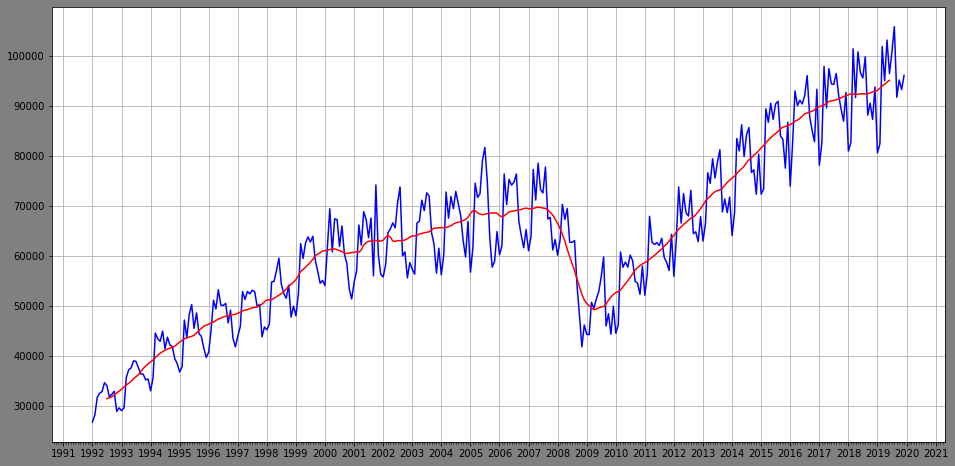

In [71]:
# plt.rcParams['figure.figsize']= (16, 8)

from matplotlib import dates as date
fig, ax = plt.subplots(figsize=(16,8), facecolor=("grey"))
ax.grid(True)


year= date.YearLocator(month=1)
month = date.MonthLocator()
yearformat = date.DateFormatter("%Y")
monthformat = date.DateFormatter("%m")

ax.xaxis.set_minor_locator(month)
ax.xaxis.grid(True)
ax.xaxis.set_major_locator(year)
ax.xaxis.set_major_formatter(yearformat)



plt.plot(df_Automobiles.index, df_Automobiles.values, c="blue")
plt.plot(add_decompose.trend.index, add_decompose.trend, c="red")

# 4.5 Plot the seasonal plot of the time series data

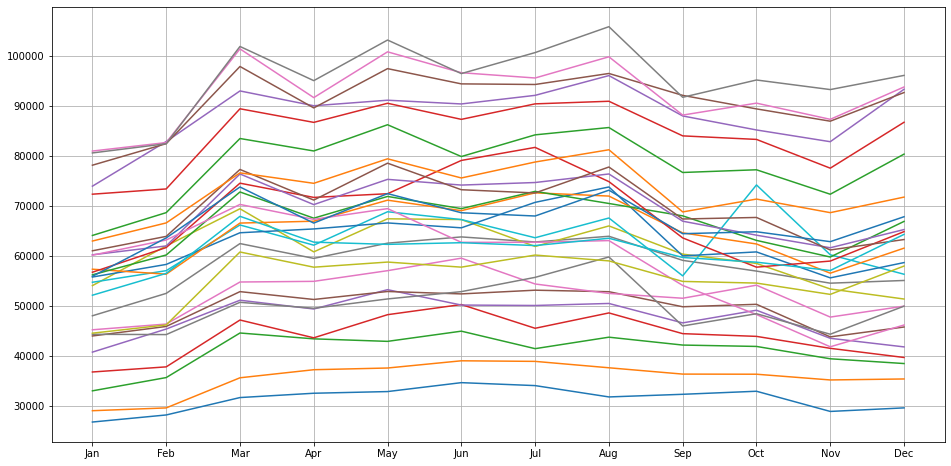

In [72]:
plt.figure(figsize=(16, 8))
plt.grid(True)
# Prepare data

df_seaoanl=df_Automobiles.copy()
df_seaoanl['year'] = [d.year for d in df_seaoanl.index.date]
df_seaoanl['month'] = [d.strftime('%b') for d in df_seaoanl.index.date]
years = df_seaoanl['year'].unique()
#fig, ax = plt.subplots(figsize=(16,8), facecolor=("grey"))
#ax.facecolor=("grey")

# make the plot
for i, n in enumerate(years):
    if i>=0:
        plt.plot("month","Automobiles" ,data=df_seaoanl[df_seaoanl["year"]==n])


The plot above show the seasonality of the dataset. And it can be seen from the plot that there is always increase of sale Clothing from nov to dec 

# 4.6. How to test for stationarity?


In [73]:
from statsmodels.tsa.stattools import adfuller, kpss

# ADF Test
result = adfuller(df_Automobiles, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')



ADF Statistic: -1.0985924133816318
p-value: 0.7156329078852922
Critial Values:
   1%, -3.451082300831733
Critial Values:
   5%, -2.87067210822307
Critial Values:
   10%, -2.5716355136268345


the the p values is greater than 0.05 which implies that there is not stationarity in the dataset. Also since the auto regression model work well on the data without seasonality and trend, I will detrend Moving Average the dataset

# 5 Built the model

# 5.1 Method 1 : Moving Average

In [74]:
df

,Month,Clothing,Appliances,FoodAndBeverage,Automobiles,GeneralMerchandise,BuildingMaterials
0,1992-01,6938,3657,29589,26788,14996,8964
1,1992-02,7524,3490,28570,28203,16015,9023
2,1992-03,8475,3669,29682,31684,17984,10608
3,1992-04,9401,3527,30228,32547,18872,11630
4,1992-05,9558,3571,31677,32883,20037,12327
...,...,...,...,...,...,...,...
331,2019-08,23829,7519,66937,105884,61777,32375
332,2019-09,19567,7123,62420,91758,54785,29963
333,2019-10,21400,7096,64849,95219,58872,32629
334,2019-11,25170,9242,66363,93303,66356,29793


In [ ]:
df_Automobiles["FoodAndBeverage"]=df["FoodAndBeverage"].values
df_Automobiles["Clothing"]=df["Clothing"].values

In [78]:
df_Automobiles

,Automobiles,FoodAndBeverage,Clothing
Month,,,
1992-01-01,26788,29589,6938
1992-02-01,28203,28570,7524
1992-03-01,31684,29682,8475
1992-04-01,32547,30228,9401
1992-05-01,32883,31677,9558
...,...,...,...
2019-08-01,105884,66937,23829
2019-09-01,91758,62420,19567
2019-10-01,95219,64849,21400


In [83]:
split = len(df_Automobiles) - int(len(df_Automobiles) * .3)

train = df_Automobiles[["Automobiles", "FoodAndBeverage", "Clothing"]][:split]
test = df_Automobiles[["Automobiles", "FoodAndBeverage", "Clothing"]][split:]

In [84]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 236 entries, 1992-01-01 to 2011-08-01
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Automobiles      236 non-null    int64
 1   FoodAndBeverage  236 non-null    int64
 2   Clothing         236 non-null    int64
dtypes: int64(3)
memory usage: 7.4 KB


In [89]:
test

,Automobiles,FoodAndBeverage,Clothing
Month,,,
2011-09-01,59708,49925,17999
2011-10-01,58769,50887,18255
2011-11-01,57102,51352,20957
2011-12-01,64334,56065,31108
2012-01-01,55945,49834,14358
...,...,...,...
2019-08-01,105884,66937,23829
2019-09-01,91758,62420,19567
2019-10-01,95219,64849,21400


In [85]:
c=train.astype("float32")
from statsmodels.tsa.statespace.varmax import VARMAX

model = VARMAX(c.drop("Clothing", axis=1), exog=c["Clothing"] , order = (1,1))
model_fit = model.fit(maxiter=1000, disp=False)


C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [86]:
model_fit.summary()

Dep. Variable:,"['Automobiles', 'FoodAndBeverage']",No. Observations:,236
Model:,"VARMAX(1,1)",Log Likelihood,-4471.871
,+ intercept,AIC,8973.743
Date:,"Mon, 28 Feb 2022",BIC,9025.700
Time:,11:21:52,HQIC,8994.687
Sample:,01-01-1992,,
,- 08-01-2011,,
Covariance Type:,opg,,
Ljung-Box (L1) (Q):,"1.61, 0.06",Jarque-Bera (JB):,"9.03, 0.14"
Prob(Q):,"0.20, 0.80",Prob(JB):,"0.01, 0.93"
Heteroskedasticity (H):,"1.30, 2.46",Skew:,"0.25, 0.05"


In [91]:
y_pred

,Automobiles,FoodAndBeverage
2011-09-01,59898.923455,49179.917139
2011-10-01,57928.428636,47166.243141
2011-11-01,57906.757781,47538.016188
2011-12-01,61781.167595,53275.039514
2012-01-01,56778.376734,47363.594287
...,...,...
2019-08-01,55932.065235,50470.442392
2019-09-01,54652.987318,48791.040325
2019-10-01,54781.827094,48857.986808
2019-11-01,56359.620625,50941.690808


In [90]:
y_pred=model_fit.forecast(len(test), exog=test["Clothing"])

C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'


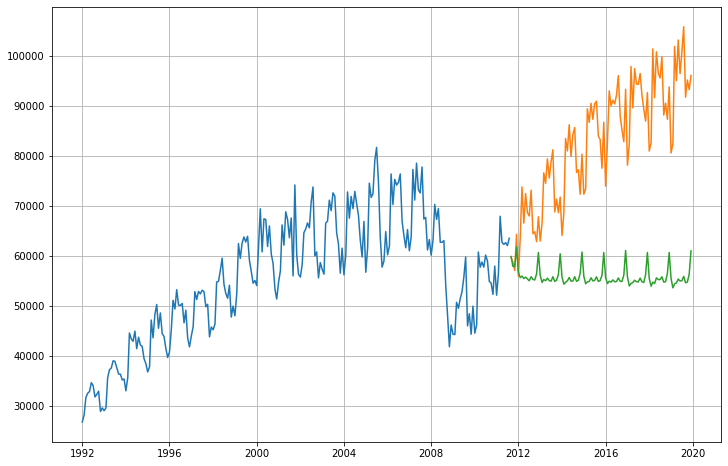

In [92]:
plt.plot(train['Automobiles'])
plt.plot(test['Automobiles'])
plt.plot(y_pred["Automobiles"])
plt.show()



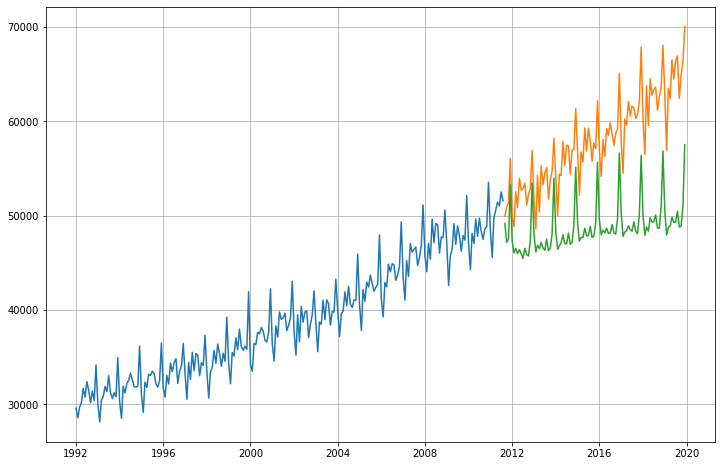

In [93]:
plt.plot(train['FoodAndBeverage'])
plt.plot(test['FoodAndBeverage'])
plt.plot(y_pred["FoodAndBeverage"])
plt.show()



In [60]:
#import statsmodels.api as sm
#mod = sm.tsa.VARMAX(c, order=(1,1))
#res = mod.fit(maxiter=1000, disp=False)
#print(res.summary())


# 6 Evaluate the method 1

In [175]:
naive_prediction_rmse = np.sqrt(mean_squared_error(y.Automobiles_test,y.predict ))
naive_prediction_r2 = r2_score(y.Automobiles_test,y.predict  )

In [176]:
result= pd.DataFrame([{"Method": "SARIMAX", "RMSE":naive_prediction_rmse, "r2":naive_prediction_r2}])
result

,Method,RMSE,r2
0,SARIMAX,21123.25812,-2.114322


# Reference

1. kaggle.com
2. tutorialpoint.com